In [37]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [38]:
df = pd.read_csv('menu.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [39]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [40]:
nutrition_features = [
    'Calories',
    'Total Fat', 
    'Sugars',
    'Protein',
    'Sodium',
    'Carbohydrates',
    'Dietary Fiber',
]

features = df[nutrition_features]
features.describe()

,Calories,Total Fat,Sugars,Protein,Sodium,Carbohydrates,Dietary Fiber
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,14.165385,29.423077,13.338462,495.750000,47.346154,1.630769
std,240.269886,14.205998,28.679797,11.426146,577.026323,28.252232,1.567717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,2.375000,5.750000,4.000000,107.500000,30.000000,0.000000
50%,340.000000,11.000000,17.500000,12.000000,190.000000,44.000000,1.000000
75%,500.000000,22.250000,48.000000,19.000000,865.000000,60.000000,3.000000
max,1880.000000,118.000000,128.000000,87.000000,3600.000000,141.000000,7.000000


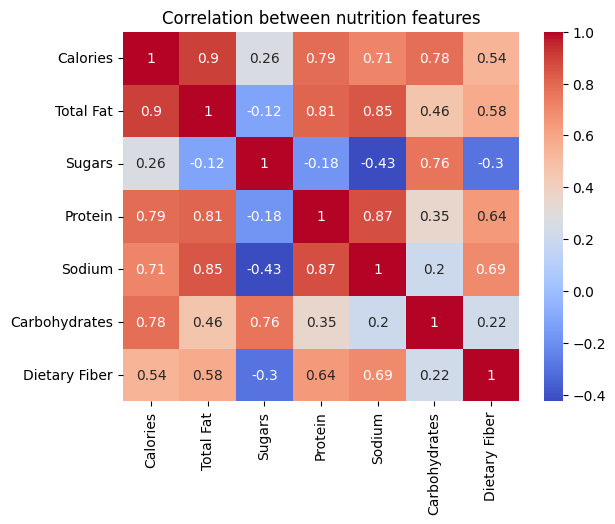

In [41]:
plt.figure()
plt.title('Correlation between nutrition features')
sns.heatmap(features.corr(), annot=True, cmap='coolwarm')
plt.show()

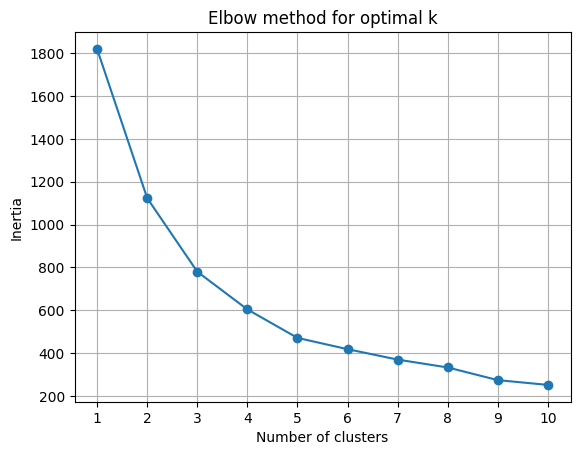

In [42]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

intertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    intertia.append(kmeans.inertia_)
    
plt.figure()
plt.title('Elbow method for optimal k')
plt.plot(range(1, 11), intertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [43]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)
plt.figure(figsize=(10, 6))
plt.show()

<Figure size 1000x600 with 0 Axes>

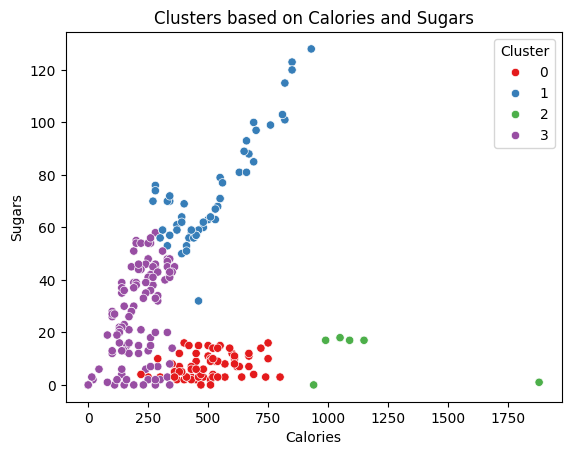

In [44]:


sns.scatterplot(x='Calories', y='Sugars', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters based on Calories and Sugars')
plt.xlabel('Calories')
plt.ylabel('Sugars')
plt.legend(title='Cluster')
plt.show()


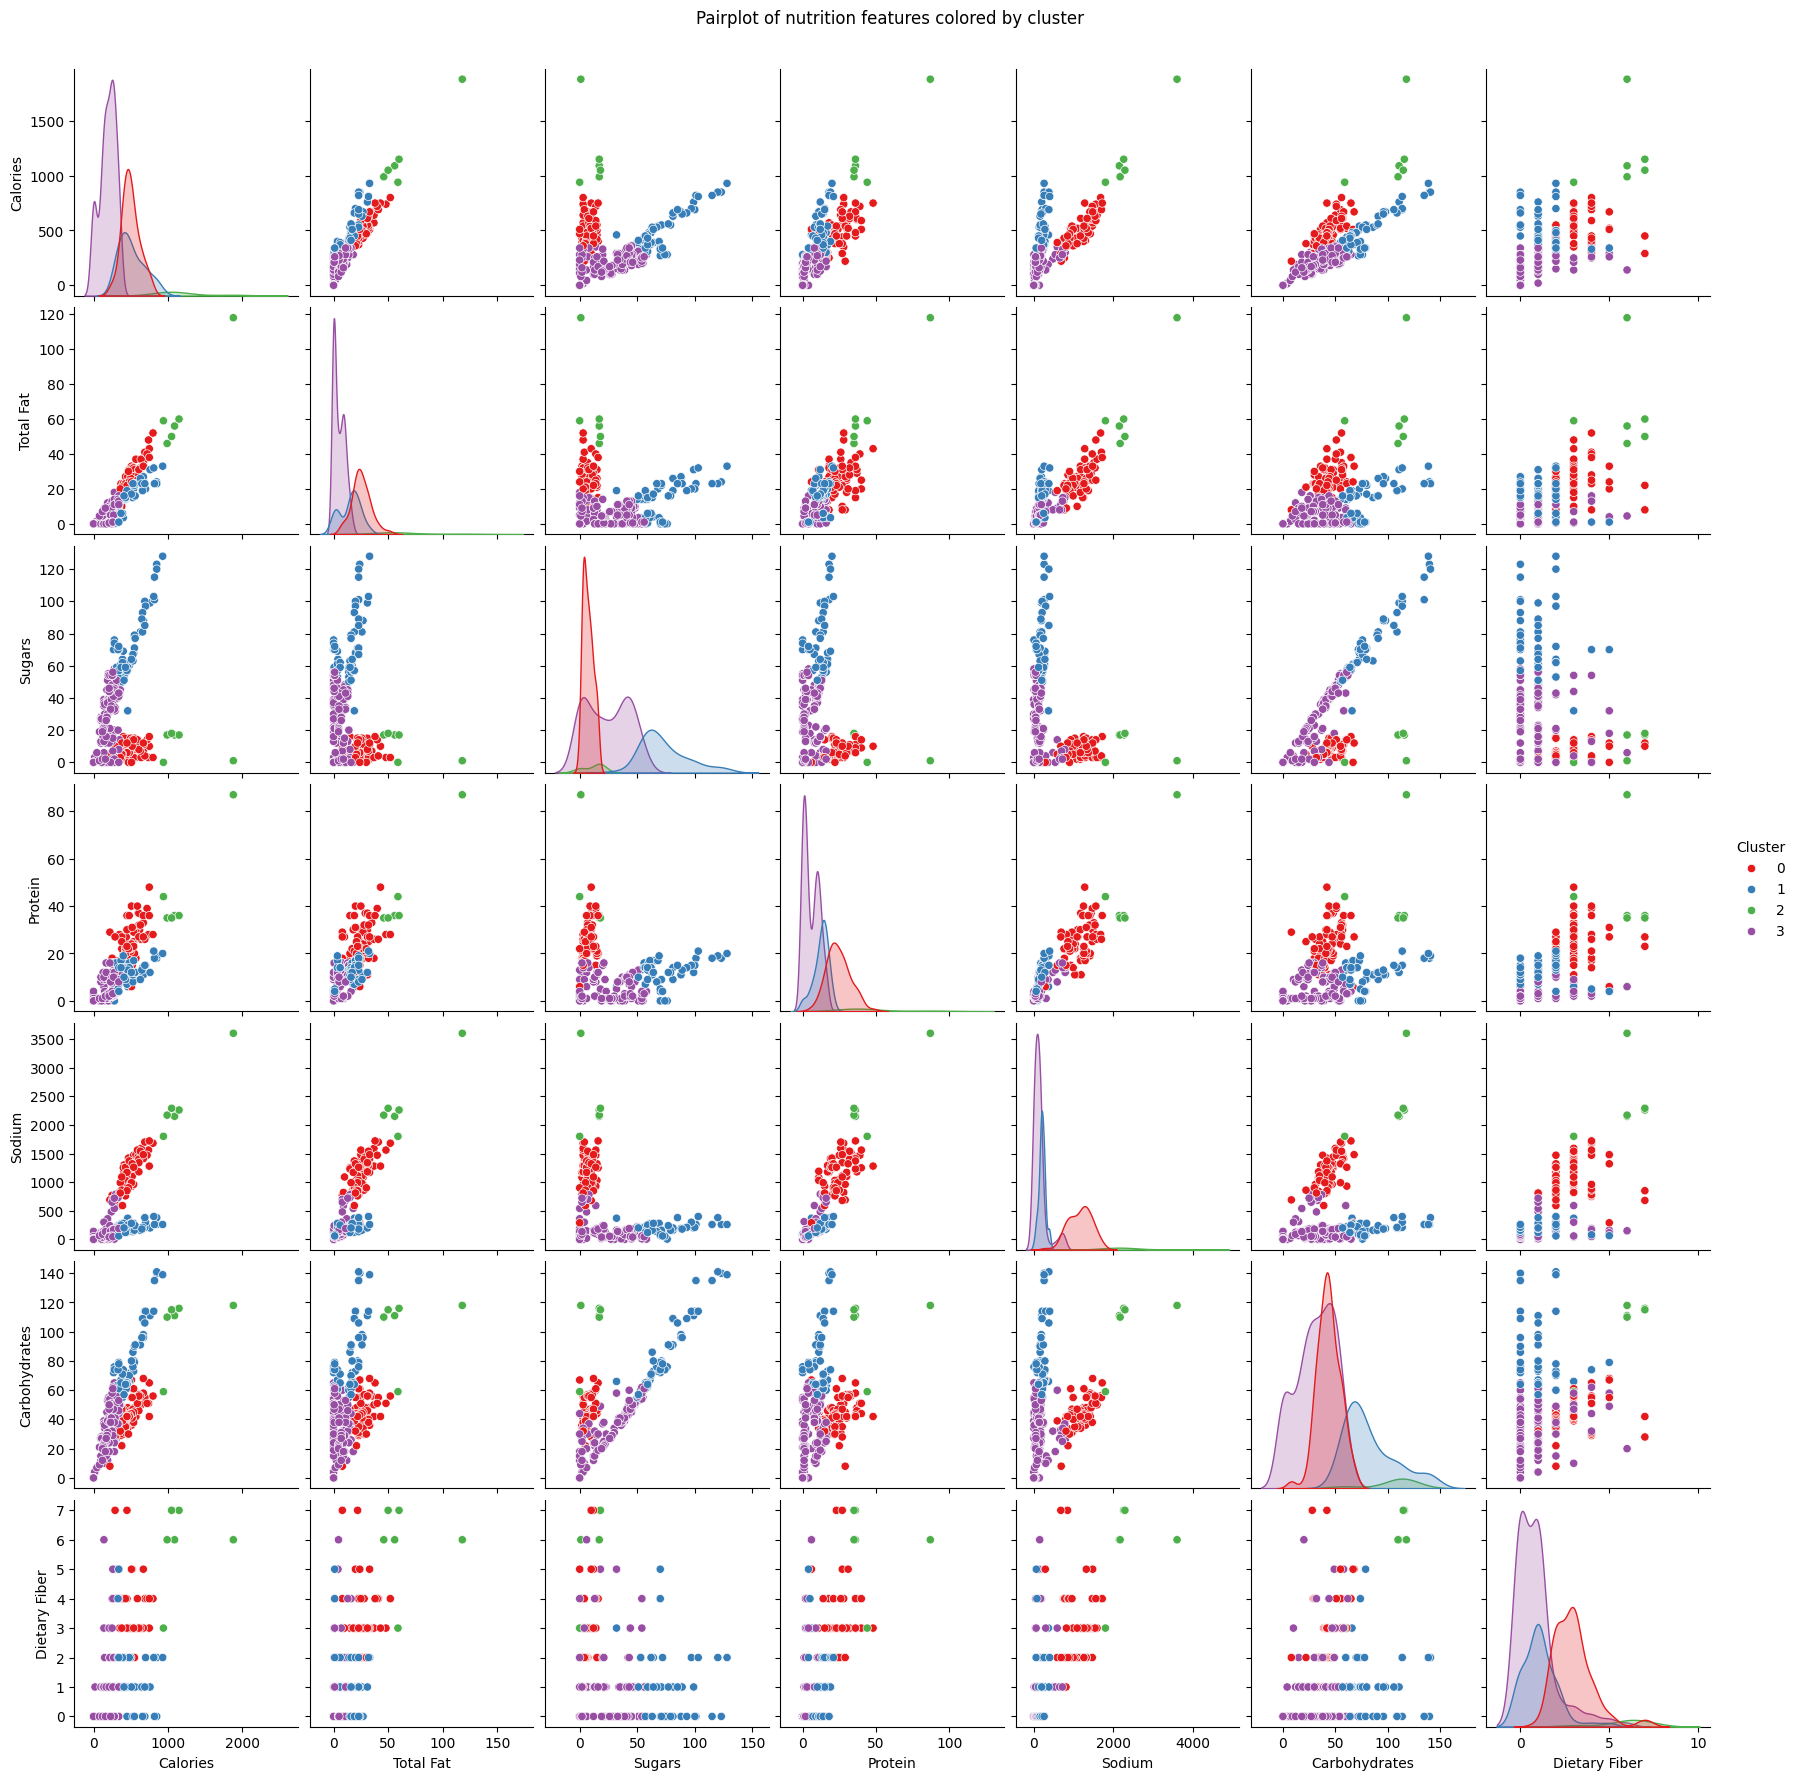

In [45]:
sns.pairplot(df, hue='Cluster', vars=nutrition_features, palette='Set1')
plt.suptitle('Pairplot of nutrition features colored by cluster', y=1.02)
plt.show()


In [46]:
# Save the clustered data to a new CSV file
df.to_csv('clustered_menu.csv', index=False)

    

In [47]:
cluster_summary = (
    df.groupby('Cluster')[nutrition_features]
    .mean()
    .round(1)
    .sort_index()
)

cluster_summary

,Calories,Total Fat,Sugars,Protein,Sodium,Carbohydrates,Dietary Fiber
Cluster,,,,,,,
0,496.8,25.2,7.2,24.3,1157.4,43.5,3.0
1,512.2,14.9,73.0,12.4,205.2,82.9,1.1
2,1183.3,64.8,11.7,45.5,2378.3,104.8,5.8
3,189.8,4.9,24.3,5.7,141.5,31.2,0.9


In [74]:
# Count of items in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
cluster_counts

Cluster
0     74
1     55
2      6
3    125
Name: count, dtype: int64

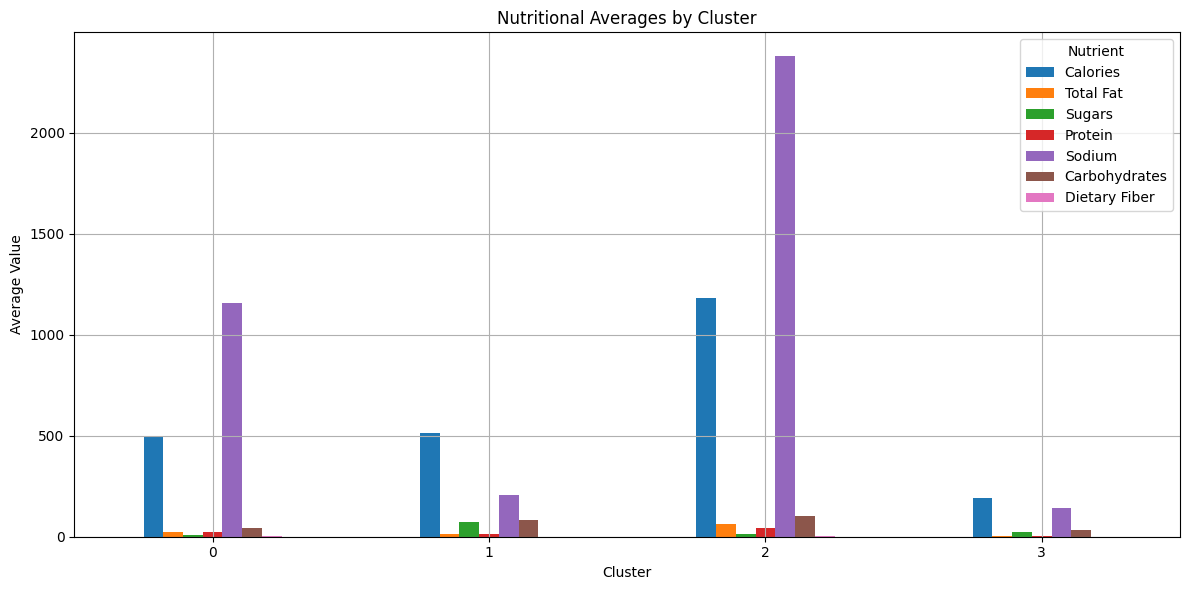

In [48]:
cluster_summary.plot(kind="bar", figsize=(12,6))
plt.title("Nutritional Averages by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.legend(title="Nutrient")
plt.tight_layout()
plt.grid()
plt.show()